In [794]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy.feature as cfeature
from math import radians, cos, sin, asin, sqrt
from sklearn.cluster import KMeans
from scipy import interpolate
from scipy.spatial import ConvexHull
import math
#from k_means_constrained import KMeansConstrained

In [665]:
data = pd.read_csv('LN - LT.csv')

In [666]:
data

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
0,30.453290,76.394585,6.83,4.34,0.77,14.58
1,26.301717,80.133402,15.48,9.89,0.93,1.38
2,10.482971,76.384688,1.21,8.26,0.57,12.96
3,26.301717,80.130000,3.04,9.54,0.53,15.58
4,31.022162,76.724332,6.74,0.21,14.40,1.14
...,...,...,...,...,...,...
74,13.020800,80.224000,3.22,8.30,0.40,17.63
75,10.078730,78.670417,2.70,0.40,9.43,11.25
76,8.469167,76.946111,0.66,7.51,3.08,10.02
77,17.712100,83.312100,0.48,18.61,7.60,3.54


In [667]:
data.describe()

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24.229996,79.481421,5.129620,7.467215,3.911646,10.206835
std,4.952235,3.545489,4.944455,6.412815,4.778758,5.929100
min,8.469167,73.353185,0.160000,0.110000,0.110000,0.140000
25%,22.276201,77.014239,0.935000,0.770000,0.670000,6.145000
50%,26.504384,80.196540,3.220000,7.510000,2.100000,9.230000
75%,26.529297,80.234894,8.310000,10.740000,5.255000,15.655000
max,31.022162,91.778177,18.410000,19.560000,18.260000,19.610000


In [668]:
A = data['Apparel'].sum()

In [669]:
B = data['Books'].sum()

In [670]:
E = data['Electronics'].sum()

In [671]:
G = data['Grocery'].sum()

In [672]:
Total = A+B+E+G

In [673]:
quan=[]
quan.append([A, B, E, G, Total])
quan_d1=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d1

,Apparel,Books,Electronics,Grocery,Total
0,405.24,589.91,309.02,806.34,2110.51


In [674]:
print('Apparel:', A, ', Books:', B, ', Electronics:', E, ', Grocery:', G, ', Total:', Total)

Apparel: 405.2400000000001 , Books: 589.91 , Electronics: 309.02 , Grocery: 806.3399999999999 , Total: 2110.51


In [675]:
print('Minimum warehouse needed:', math.ceil(G/100))

Minimum warehouse needed: 9


In [676]:
La = data['Latitude'].mean()

In [677]:
Lo = data['Longitude'].mean()

In [678]:
print(La, Lo)

24.229996390126576 79.48142135696202


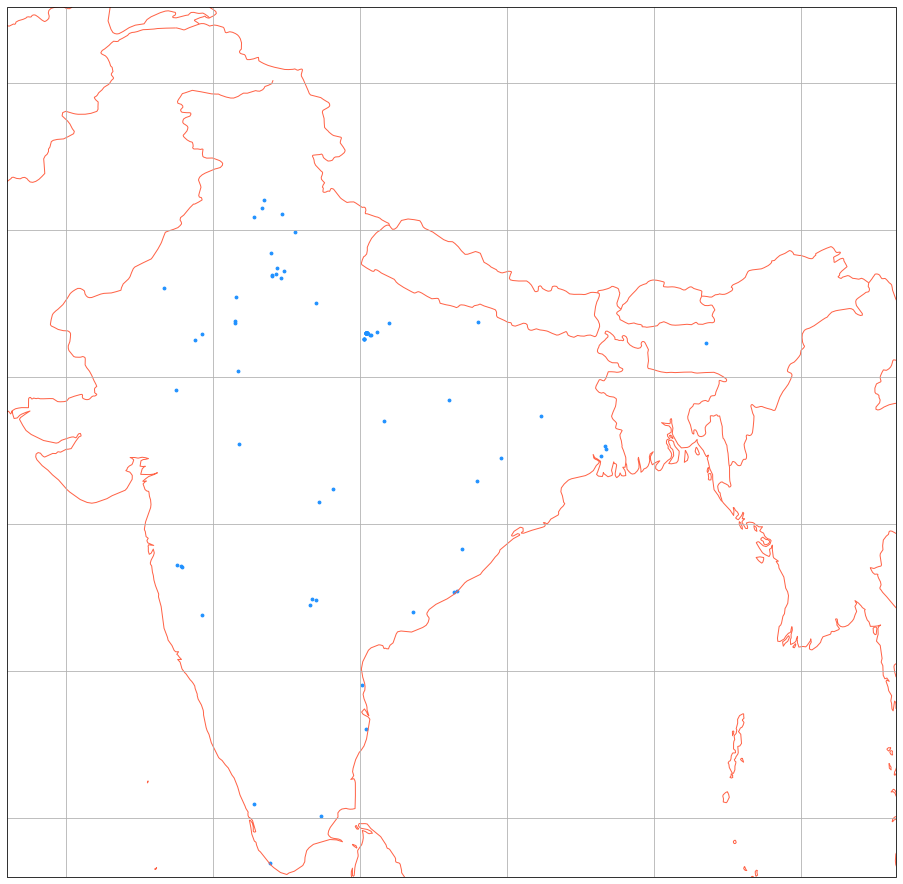

In [679]:
fig = plt.figure(figsize=(20,16))

#ax = fig.add_subplot(1,1,1, projection=crs.Robinson())
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()

ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=data.Longitude, y=data.Latitude,
            color="dodgerblue",
            s=8,
            alpha=1,
            transform=crs.PlateCarree())

plt.savefig('scatter_only.png')
plt.show()

In [680]:
list1=[]
for i in range (0, len(data)):
    lat = data['Latitude'][i]
    ln = data['Longitude'][i]
    if (8.1<=lat<=37.1) and (68.16<=ln<=97.42):
        continue
    else:
        list1.append(i)
        
for k in list1:
    data=data.drop(k)

In [681]:
data

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
0,30.453290,76.394585,6.83,4.34,0.77,14.58
1,26.301717,80.133402,15.48,9.89,0.93,1.38
2,10.482971,76.384688,1.21,8.26,0.57,12.96
3,26.301717,80.130000,3.04,9.54,0.53,15.58
4,31.022162,76.724332,6.74,0.21,14.40,1.14
...,...,...,...,...,...,...
74,13.020800,80.224000,3.22,8.30,0.40,17.63
75,10.078730,78.670417,2.70,0.40,9.43,11.25
76,8.469167,76.946111,0.66,7.51,3.08,10.02
77,17.712100,83.312100,0.48,18.61,7.60,3.54


In [682]:
data = data.reset_index(drop=True)

In [683]:
data

,Latitude,Longitude,Apparel,Books,Electronics,Grocery
0,30.453290,76.394585,6.83,4.34,0.77,14.58
1,26.301717,80.133402,15.48,9.89,0.93,1.38
2,10.482971,76.384688,1.21,8.26,0.57,12.96
3,26.301717,80.130000,3.04,9.54,0.53,15.58
4,31.022162,76.724332,6.74,0.21,14.40,1.14
...,...,...,...,...,...,...
74,13.020800,80.224000,3.22,8.30,0.40,17.63
75,10.078730,78.670417,2.70,0.40,9.43,11.25
76,8.469167,76.946111,0.66,7.51,3.08,10.02
77,17.712100,83.312100,0.48,18.61,7.60,3.54


In [684]:
list2 = []
for i in range(0, len(data)):
    lt = data['Latitude'][i]
    ln = data['Longitude'][i]
    lat = radians(lt)
    lnt = radians(ln)
    list2.append([lat, lnt])

In [685]:
df = pd.DataFrame(list2, columns=['Lat', 'Lon'])

In [686]:
data1 = pd.concat([data, df], axis=1, join='inner')

In [687]:
data1

,Latitude,Longitude,Apparel,Books,Electronics,Grocery,Lat,Lon
0,30.453290,76.394585,6.83,4.34,0.77,14.58,0.531510,1.333337
1,26.301717,80.133402,15.48,9.89,0.93,1.38,0.459052,1.398592
2,10.482971,76.384688,1.21,8.26,0.57,12.96,0.182962,1.333164
3,26.301717,80.130000,3.04,9.54,0.53,15.58,0.459052,1.398532
4,31.022162,76.724332,6.74,0.21,14.40,1.14,0.541439,1.339092
...,...,...,...,...,...,...,...,...
74,13.020800,80.224000,3.22,8.30,0.40,17.63,0.227256,1.400173
75,10.078730,78.670417,2.70,0.40,9.43,11.25,0.175907,1.373058
76,8.469167,76.946111,0.66,7.51,3.08,10.02,0.147815,1.342963
77,17.712100,83.312100,0.48,18.61,7.60,3.54,0.309134,1.454070


In [688]:
list_d=[]
for i in range(0, len(data1)):
    ele1=data1['Lat'][i]
    ele2=data1['Lon'][i]
    dist=0
    for i in range(0, len(data1)):
        ele3 = data1['Lat'][i]
        ele4 = data1['Lon'][i]
        DLat = ele3-ele1
        DLon = ele4-ele2
        D = sin(DLat / 2)**2 + cos(ele1) * cos(ele2) * sin(DLon / 2)**2
        if D<0:
            F=D
            D=(-F)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_d.append(dist)

In [689]:
min(list_d)
ind = list_d.index(min(list_d))
print(ind, min(list_d))
Co_1=min(list_d)

43 32068.619429210157


In [690]:
print(data1['Latitude'][41], data1['Longitude'][41])

26.504414 80.2265755


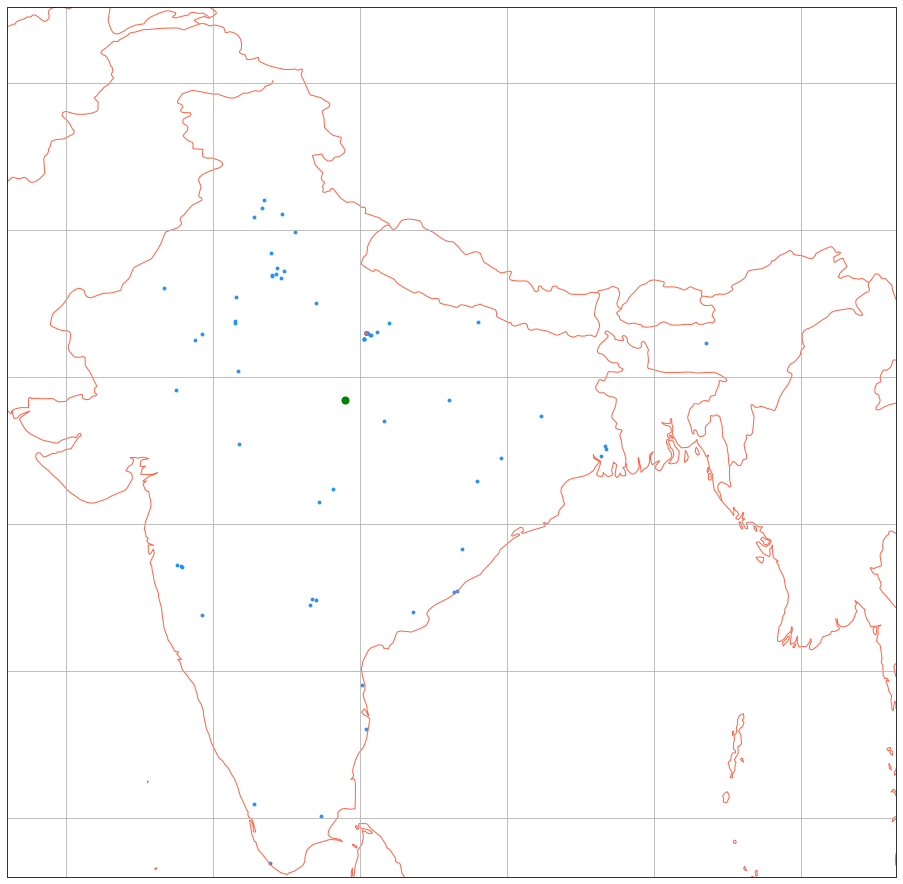

In [691]:
fig = plt.figure(figsize=(20,16))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=data.Longitude, y=data.Latitude,
            color="dodgerblue",
            s=8,
            alpha=1,
            transform=crs.PlateCarree())

plt.scatter(x=data1['Longitude'][41], y=data1['Latitude'][41],
            color="tomato",
            s=8,
            alpha=1,
            transform=crs.PlateCarree())

plt.scatter(x=Lo, y=La,
            color="green",
            s=50,
            alpha=1,
            transform=crs.PlateCarree())

plt.savefig('scatter1.png')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


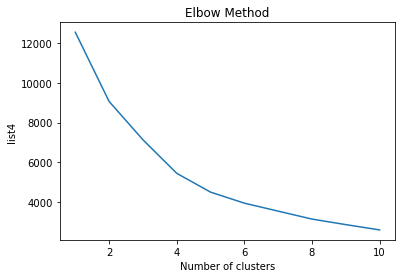

In [692]:
list4 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data1)
    list4.append(kmeans.inertia_)
plt.plot(range(1, 11), list4)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('list4')
plt.savefig('elbow.png')
plt.show()

In [693]:
list4

[12532.183724146811,
 9056.185461985935,
 7134.4749407402505,
 5448.831980980521,
 4504.95694845895,
 3951.3679399183798,
 3550.048928261014,
 3152.058135201347,
 2873.572266179418,
 2608.046153502331]

In [694]:
for i in range(1, len(list4)):
    print(list4[i]-list4[i-1])

-3475.998262160876
-1921.7105212456845
-1685.6429597597298
-943.8750325215706
-553.5890085405704
-401.31901165736554
-397.99079305966734
-278.4858690219289
-265.526112677087


In [751]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [752]:
ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

In [753]:
c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)
c5 = k_data[k_data['ykmeans']==4]
c5 = c5.reset_index(drop=True)

In [754]:
clust = [c1,c2,c3,c4,c5]

In [755]:
kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

,Latitude,Longitude
0,21.562635,86.163641
1,26.372268,80.425056
2,18.769526,76.982077
3,11.315807,78.462551
4,28.260735,76.212671


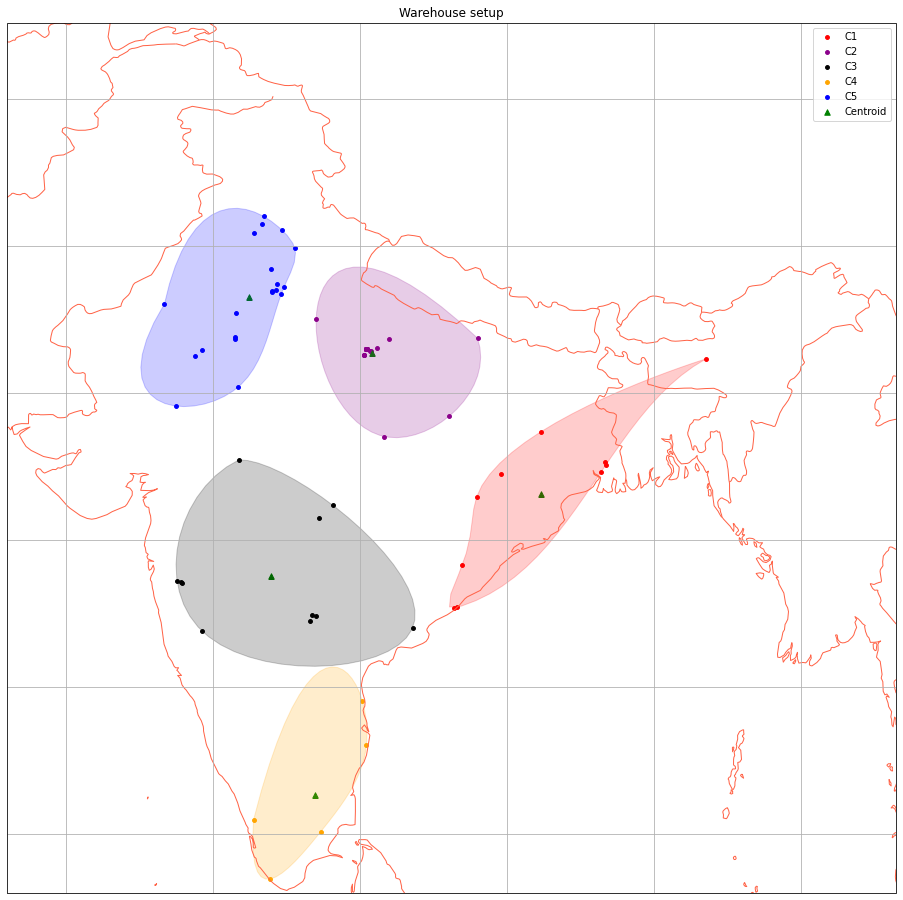

In [756]:
fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=c4.Longitude, y=c4.Latitude, s = 15, c = 'orange', label = 'C4', transform=crs.PlateCarree())
plt.scatter(x=c5.Longitude, y=c5.Latitude, s = 15, c = 'blue', label = 'C5', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values
points4 = c4[['Longitude', 'Latitude']].values
points5 = c5[['Longitude', 'Latitude']].values

list5 = [points1, points2, points3, points4, points5]
colors = ['red', 'darkmagenta', 'black', 'orange', 'blue']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


plt.legend()
plt.savefig('scatter5.png')
plt.show()

In [757]:
cc1 = kmeans.cluster_centers_

In [702]:
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])

In [703]:
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)

In [704]:
print(list_dis)
Co_5=sum(list_dis)
sum(list_dis)

[3562.781036355299, 2025.5082519823902, 3582.2708294001286, 1409.5354997348607, 4116.587534200977]


14696.683151673655

In [705]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])

In [706]:
quan_d5=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d5

,Apparel,Books,Electronics,Grocery,Total
0,50.16,109.19,58.68,62.14,280.17
1,191.17,250.74,93.49,333.59,868.99
2,58.30,59.18,55.41,126.51,299.40
3,11.95,42.61,13.75,61.09,129.40
4,93.66,128.19,87.69,223.01,532.55


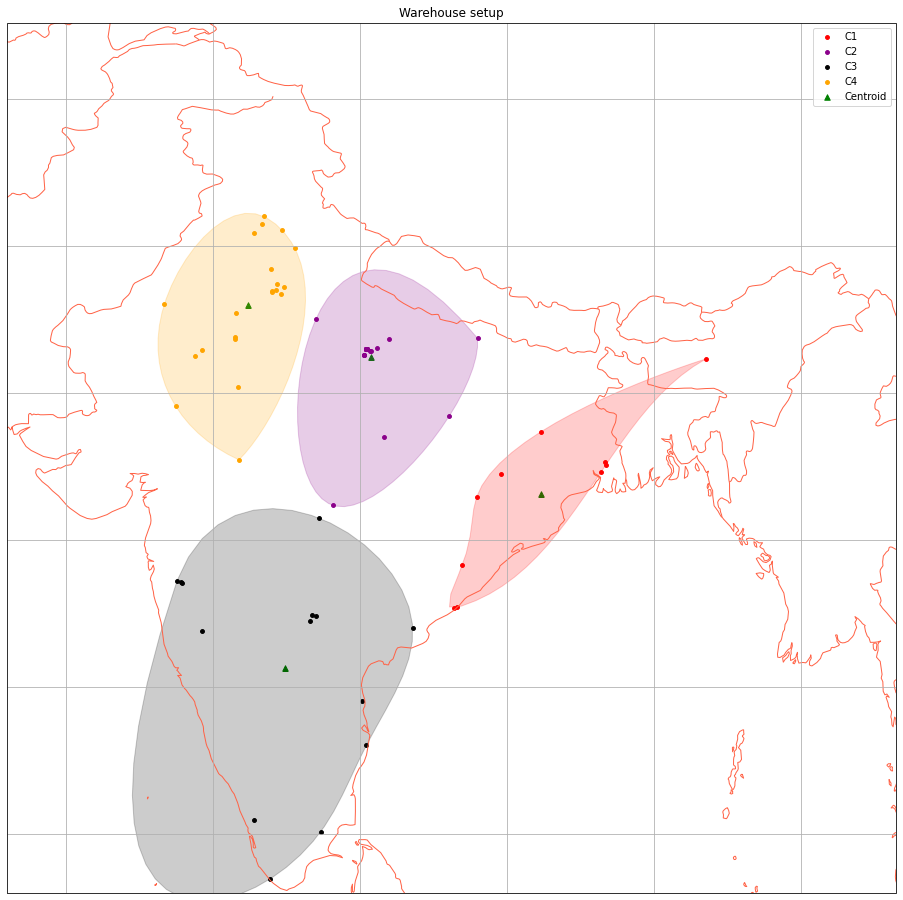

In [707]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

clust = [c1,c2,c3,c4]

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=c4.Longitude, y=c4.Latitude, s = 15, c = 'orange', label = 'C4', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values
points4 = c4[['Longitude', 'Latitude']].values

list5 = [points1, points2, points3, points4]
colors = ['red', 'darkmagenta', 'black', 'orange']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)



plt.legend()
plt.savefig('scatter4.png')
plt.show()

In [708]:
cc1 = kmeans.cluster_centers_
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)

In [709]:
print(list_dis)
Co_4=sum(list_dis)
sum(list_dis)

[3562.781036355299, 2868.3885527514885, 6301.563753949649, 4767.900971066421]


17500.634314122857

In [710]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d4=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d4

,Apparel,Books,Electronics,Grocery,Total
0,50.16,109.19,58.68,62.14,280.17
1,191.88,270.30,95.44,339.79,897.41
2,59.66,82.08,64.55,162.44,368.73
3,103.54,128.34,90.35,241.97,564.20


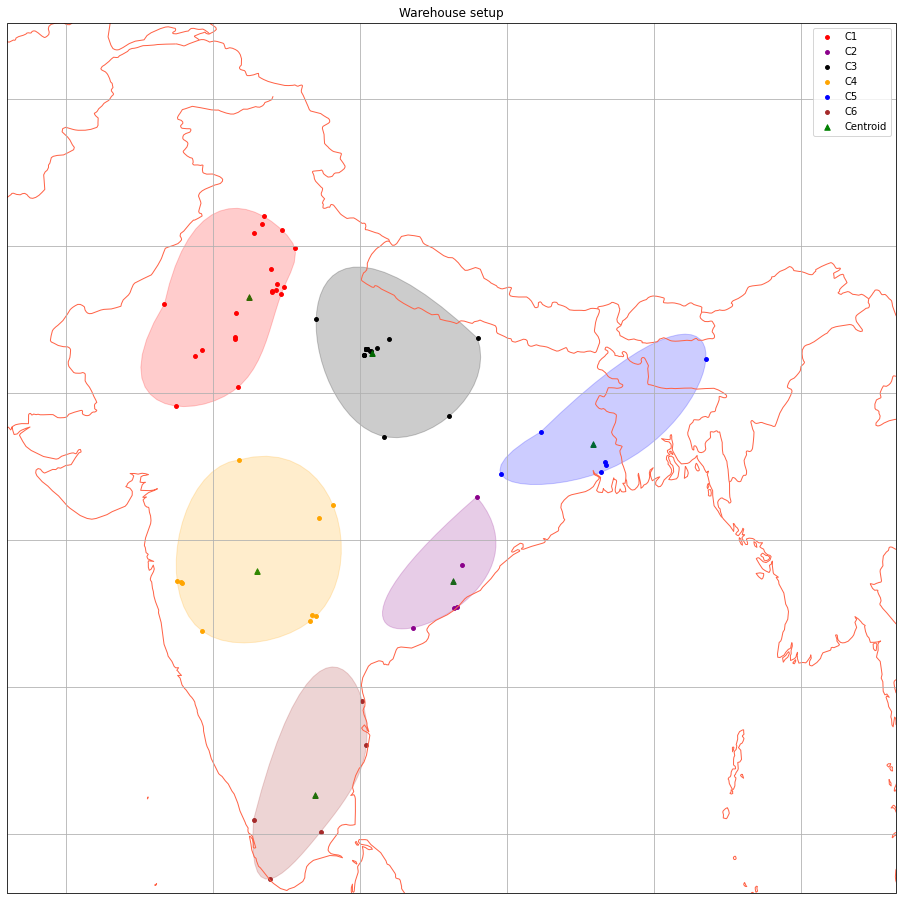

In [711]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)
c5 = k_data[k_data['ykmeans']==4]
c5 = c5.reset_index(drop=True)
c6 = k_data[k_data['ykmeans']==5]
c6 = c6.reset_index(drop=True)

clust = [c1,c2,c3,c4, c5, c6]

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=c4.Longitude, y=c4.Latitude, s = 15, c = 'orange', label = 'C4', transform=crs.PlateCarree())
plt.scatter(x=c5.Longitude, y=c5.Latitude, s = 15, c = 'blue', label = 'C5', transform=crs.PlateCarree())
plt.scatter(x=c6.Longitude, y=c6.Latitude, s = 15, c = 'brown', label = 'C6', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values
points4 = c4[['Longitude', 'Latitude']].values
points5 = c5[['Longitude', 'Latitude']].values
points6 = c6[['Longitude', 'Latitude']].values

list5 = [points1, points2, points3, points4, points5, points6]
colors = ['red', 'darkmagenta', 'black', 'orange', 'blue', 'brown']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


plt.legend()
plt.savefig('scatter6.png')
plt.show()

In [712]:
cc1 = kmeans.cluster_centers_
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_6=sum(list_dis)
sum(list_dis)

[4116.587534200977, 830.1236264057279, 2025.5082519823902, 3028.9809469882302, 1313.3459438055809, 1409.5354997348607]


12724.081803117766

In [713]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d6=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d6

,Apparel,Books,Electronics,Grocery,Total
0,93.66,128.19,87.69,223.01,532.55
1,19.11,46.91,40.49,38.01,144.52
2,191.17,250.74,93.49,333.59,868.99
3,57.77,50.89,53.09,107.62,269.37
4,31.58,70.57,20.51,43.02,165.68
5,11.95,42.61,13.75,61.09,129.40


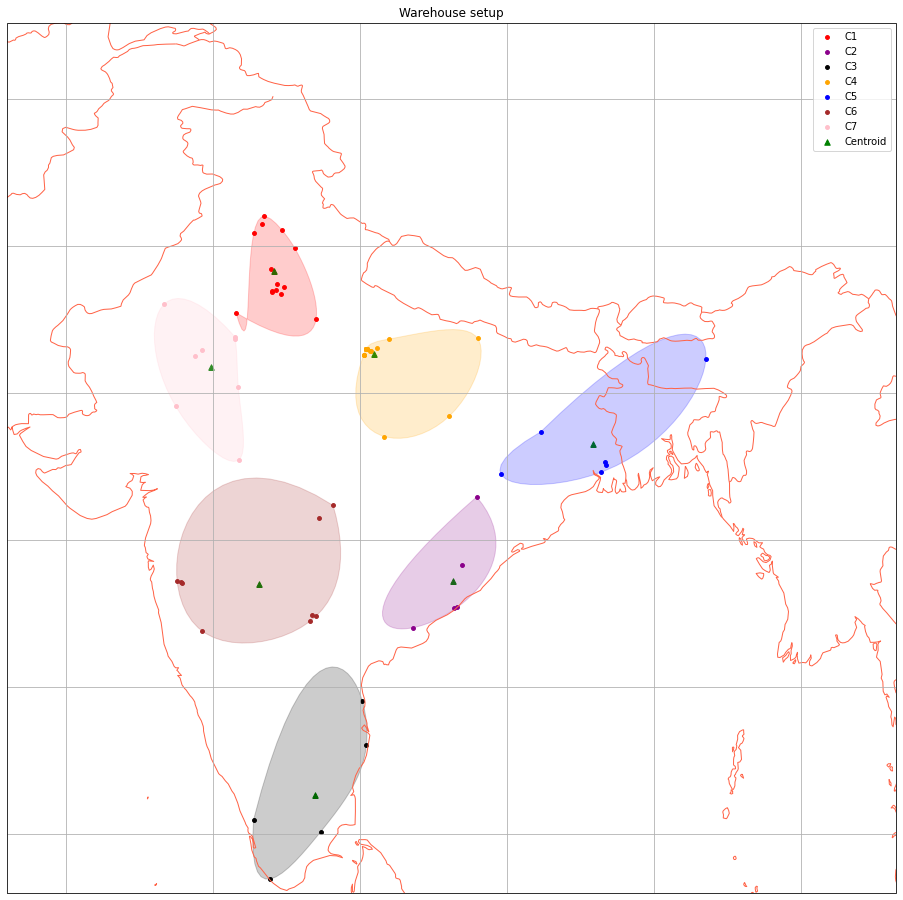

In [714]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)
c5 = k_data[k_data['ykmeans']==4]
c5 = c5.reset_index(drop=True)
c6 = k_data[k_data['ykmeans']==5]
c6 = c6.reset_index(drop=True)
c7 = k_data[k_data['ykmeans']==6]
c7 = c7.reset_index(drop=True)

clust = [c1,c2,c3,c4, c5, c6, c7]

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=c4.Longitude, y=c4.Latitude, s = 15, c = 'orange', label = 'C4', transform=crs.PlateCarree())
plt.scatter(x=c5.Longitude, y=c5.Latitude, s = 15, c = 'blue', label = 'C5', transform=crs.PlateCarree())
plt.scatter(x=c6.Longitude, y=c6.Latitude, s = 15, c = 'brown', label = 'C6', transform=crs.PlateCarree())
plt.scatter(x=c7.Longitude, y=c7.Latitude, s = 15, c = 'pink', label = 'C7', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values
points4 = c4[['Longitude', 'Latitude']].values
points5 = c5[['Longitude', 'Latitude']].values
points6 = c6[['Longitude', 'Latitude']].values
points7 = c7[['Longitude', 'Latitude']].values

list5 = [points1, points2, points3, points4, points5, points6, points7]
colors = ['red', 'darkmagenta', 'black', 'orange', 'blue', 'brown', 'pink']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


plt.legend()
plt.savefig('scatter7.png')
plt.show()

In [715]:
cc1 = kmeans.cluster_centers_
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_7=sum(list_dis)
sum(list_dis)

[1701.5723850592037, 830.1236264057279, 1409.5354997348607, 1963.0508316829428, 1313.3459438055809, 2544.6147225972595, 1378.526625398586]


11140.769634684162

In [716]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d7=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d7

,Apparel,Books,Electronics,Grocery,Total
0,70.82,92.99,71.70,130.06,365.57
1,19.11,46.91,40.49,38.01,144.52
2,11.95,42.61,13.75,61.09,129.40
3,182.41,237.05,93.09,330.92,843.47
4,31.58,70.57,20.51,43.02,165.68
5,47.89,50.74,50.43,88.66,237.72
6,41.48,49.04,19.05,114.58,224.15


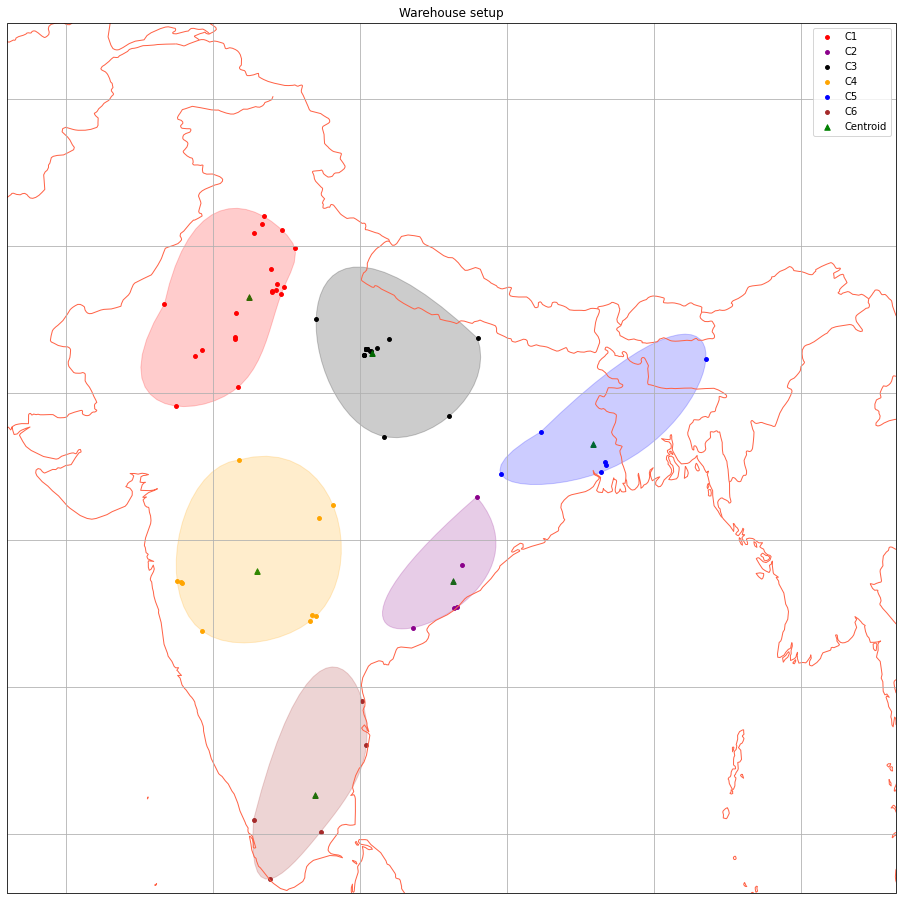

In [717]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)
c5 = k_data[k_data['ykmeans']==4]
c5 = c5.reset_index(drop=True)
c6 = k_data[k_data['ykmeans']==5]
c6 = c6.reset_index(drop=True)

clust = [c1,c2,c3,c4, c5, c6]

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=c4.Longitude, y=c4.Latitude, s = 15, c = 'orange', label = 'C4', transform=crs.PlateCarree())
plt.scatter(x=c5.Longitude, y=c5.Latitude, s = 15, c = 'blue', label = 'C5', transform=crs.PlateCarree())
plt.scatter(x=c6.Longitude, y=c6.Latitude, s = 15, c = 'brown', label = 'C6', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values
points4 = c4[['Longitude', 'Latitude']].values
points5 = c5[['Longitude', 'Latitude']].values
points6 = c6[['Longitude', 'Latitude']].values

list5 = [points1, points2, points3, points4, points5, points6]
colors = ['red', 'darkmagenta', 'black', 'orange', 'blue', 'brown']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


plt.legend()
plt.show()

In [718]:
cc1 = kmeans.cluster_centers_
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
sum(list_dis)

[4116.587534200977, 830.1236264057279, 2025.5082519823902, 3028.9809469882302, 1313.3459438055809, 1409.5354997348607]


12724.081803117766

In [719]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d66=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d66

,Apparel,Books,Electronics,Grocery,Total
0,93.66,128.19,87.69,223.01,532.55
1,19.11,46.91,40.49,38.01,144.52
2,191.17,250.74,93.49,333.59,868.99
3,57.77,50.89,53.09,107.62,269.37
4,31.58,70.57,20.51,43.02,165.68
5,11.95,42.61,13.75,61.09,129.40


In [720]:
X_C1=c1[c1.columns[0:2]]
kmeans_c1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_c1 = kmeans_c1.fit_predict(X_C1)

ykmeans_c1 = pd.DataFrame(y_kmeans_c1, columns = ['ykmeans_c1'])
k_data_c1 = pd.concat([c1, ykmeans_c1], axis=1)

cc11 = k_data_c1[k_data_c1['ykmeans_c1']==0]
cc11 = cc11.reset_index(drop=True)
cc12 = k_data_c1[k_data_c1['ykmeans_c1']==1]
cc12 = cc12.reset_index(drop=True)
cc13 = k_data_c1[k_data_c1['ykmeans_c1']==2]
cc13 = cc13.reset_index(drop=True)

clust_c1 = [cc11, cc12, cc13]

In [721]:
quan=[]
for i in clust_c1:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d61=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d61

,Apparel,Books,Electronics,Grocery,Total
0,37.61,42.22,52.18,65.85,197.86
1,31.60,48.89,16.39,95.62,192.50
2,24.45,37.08,19.12,61.54,142.19


In [722]:
X_c3=c3[c3.columns[0:2]]
kmeans_c3 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_c3 = kmeans_c3.fit_predict(X_c3)

ykmeans_c3 = pd.DataFrame(y_kmeans_c3, columns = ['ykmeans_c3'])
k_data_c3 = pd.concat([c3, ykmeans_c3], axis=1)

cc31 = k_data_c3[k_data_c3['ykmeans_c3']==0]
cc31 = cc31.reset_index(drop=True)
cc32 = k_data_c3[k_data_c3['ykmeans_c3']==1]
cc32 = cc32.reset_index(drop=True)
#cc33 = k_data_c3[k_data_c3['ykmeans_c3']==2]
#cc33 = cc33.reset_index(drop=True)
#cc34 = k_data_c3[k_data_c3['ykmeans_c3']==3]
#cc34 = cc34.reset_index(drop=True)
#cc35 = k_data_c3[k_data_c3['ykmeans_c3']==2]
#cc35 = cc35.reset_index(drop=True)

clust_c3 = [cc31, cc32]

In [723]:
quan=[]
for i in clust_c3:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d62=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d62

,Apparel,Books,Electronics,Grocery,Total
0,175.17,235.03,66.17,317.98,794.35
1,16.00,15.71,27.32,15.61,74.64


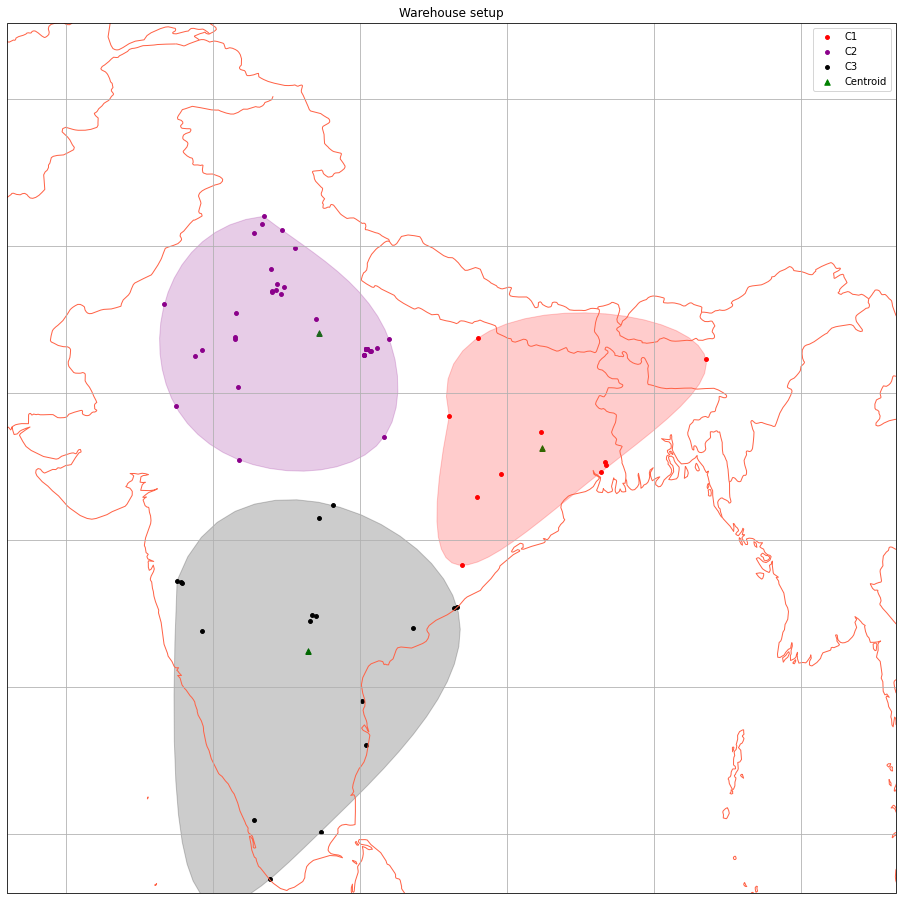

In [724]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)


clust = [c1,c2,c3]

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values

list5 = [points1, points2, points3]
colors = ['red', 'darkmagenta', 'black']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)

plt.savefig('scatter3.png')
plt.legend()
plt.show()

In [725]:
cc1 = kmeans.cluster_centers_
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_3=sum(list_dis)
sum(list_dis)

[3208.4894560174776, 13001.125529470679, 7867.5111659681925]


24077.12615145635

In [726]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d3=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d3

,Apparel,Books,Electronics,Grocery,Total
0,59.79,98.23,43.87,68.26,270.15
1,279.38,371.27,174.54,562.98,1388.17
2,66.07,120.41,90.61,175.10,452.19


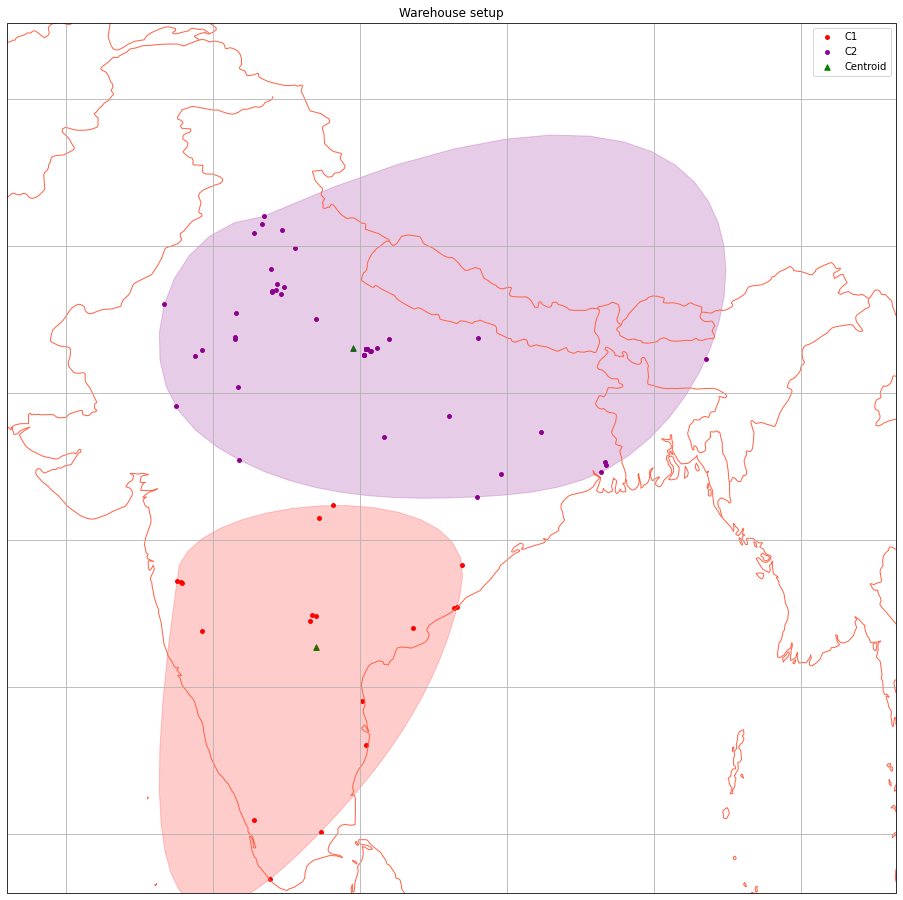

In [727]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)


clust = [c1,c2]

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values

list5 = [points1, points2]
colors = ['red', 'darkmagenta']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)

plt.savefig('scatter2.png')
plt.legend()
plt.show()

In [728]:
cc1 = kmeans.cluster_centers_
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1[i][0]
    ln = cc1[i][1]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_2=sum(list_dis)
sum(list_dis)

[8418.086472021916, 18676.626642234]


27094.713114255916

In [729]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d2=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d2

,Apparel,Books,Electronics,Grocery,Total
0,66.67,139.81,99.69,178.70,484.87
1,338.57,450.10,209.33,627.64,1625.64


In [730]:
quan_d1

,Apparel,Books,Electronics,Grocery,Total
0,405.24,589.91,309.02,806.34,2110.51


In [731]:
quan_d2

,Apparel,Books,Electronics,Grocery,Total
0,66.67,139.81,99.69,178.70,484.87
1,338.57,450.10,209.33,627.64,1625.64


In [732]:
quan_d3

,Apparel,Books,Electronics,Grocery,Total
0,59.79,98.23,43.87,68.26,270.15
1,279.38,371.27,174.54,562.98,1388.17
2,66.07,120.41,90.61,175.10,452.19


In [733]:
quan_d4

,Apparel,Books,Electronics,Grocery,Total
0,50.16,109.19,58.68,62.14,280.17
1,191.88,270.30,95.44,339.79,897.41
2,59.66,82.08,64.55,162.44,368.73
3,103.54,128.34,90.35,241.97,564.20


In [734]:
quan_d5

,Apparel,Books,Electronics,Grocery,Total
0,50.16,109.19,58.68,62.14,280.17
1,191.17,250.74,93.49,333.59,868.99
2,58.30,59.18,55.41,126.51,299.40
3,11.95,42.61,13.75,61.09,129.40
4,93.66,128.19,87.69,223.01,532.55


In [735]:
quan_d6

,Apparel,Books,Electronics,Grocery,Total
0,93.66,128.19,87.69,223.01,532.55
1,19.11,46.91,40.49,38.01,144.52
2,191.17,250.74,93.49,333.59,868.99
3,57.77,50.89,53.09,107.62,269.37
4,31.58,70.57,20.51,43.02,165.68
5,11.95,42.61,13.75,61.09,129.40


In [736]:
quan_d7

,Apparel,Books,Electronics,Grocery,Total
0,70.82,92.99,71.70,130.06,365.57
1,19.11,46.91,40.49,38.01,144.52
2,11.95,42.61,13.75,61.09,129.40
3,182.41,237.05,93.09,330.92,843.47
4,31.58,70.57,20.51,43.02,165.68
5,47.89,50.74,50.43,88.66,237.72
6,41.48,49.04,19.05,114.58,224.15


In [737]:
quan_d1.to_csv('quan_d1.csv')
quan_d2.to_csv('quan_d2.csv')
quan_d3.to_csv('quan_d3.csv')
quan_d4.to_csv('quan_d4.csv')
quan_d5.to_csv('quan_d5.csv')
quan_d6.to_csv('quan_d6.csv')
quan_d7.to_csv('quan_d7.csv')

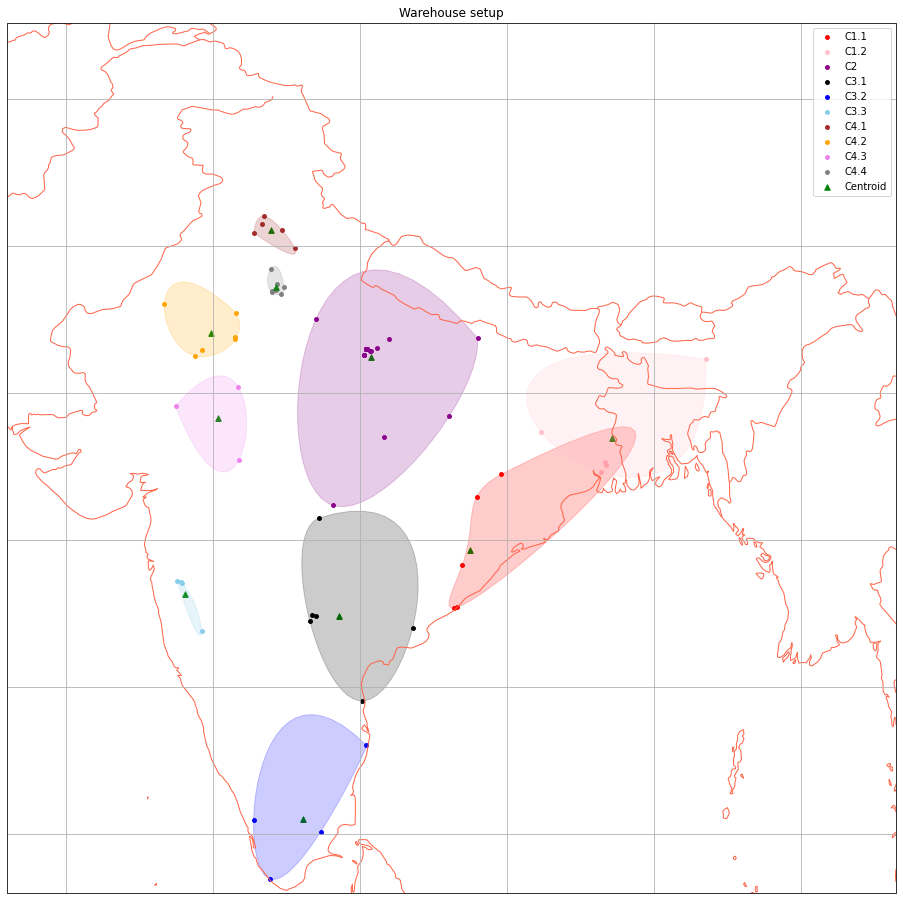

In [774]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc.drop(kmeanscc.index[3], inplace = True)
kmeanscc.drop(kmeanscc.index[2], inplace = True)
kmeanscc.drop(kmeanscc.index[0], inplace = True)

X1=c1[c1.columns[0:2]]
kmeans_c1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_c1 = kmeans_c1.fit_predict(X1)

ykmeans_c1 = pd.DataFrame(y_kmeans_c1, columns = ['ykmeans_c1'])
k_data_c1 = pd.concat([c1, ykmeans_c1], axis=1)

c11 = k_data_c1[k_data_c1['ykmeans_c1']==0]
c11 = c11.reset_index(drop=True)
c12 = k_data_c1[k_data_c1['ykmeans_c1']==1]
c12 = c12.reset_index(drop=True)


X3=c3[c3.columns[0:2]]
kmeans_c3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_c3 = kmeans_c3.fit_predict(X3)

ykmeans_c3 = pd.DataFrame(y_kmeans_c3, columns = ['ykmeans_c3'])
k_data_c3 = pd.concat([c3, ykmeans_c3], axis=1)

c31 = k_data_c3[k_data_c3['ykmeans_c3']==0]
c31 = c31.reset_index(drop=True)
c32 = k_data_c3[k_data_c3['ykmeans_c3']==1]
c32 = c32.reset_index(drop=True)
c33 = k_data_c3[k_data_c3['ykmeans_c3']==2]
c33 = c33.reset_index(drop=True)


X4=c4[c4.columns[0:2]]
kmeans_c4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_c4 = kmeans_c4.fit_predict(X4)

ykmeans_c4 = pd.DataFrame(y_kmeans_c4, columns = ['ykmeans_c4'])
k_data_c4 = pd.concat([c4, ykmeans_c4], axis=1)

c41 = k_data_c4[k_data_c4['ykmeans_c4']==0]
c41 = c41.reset_index(drop=True)
c42 = k_data_c4[k_data_c4['ykmeans_c4']==1]
c42 = c42.reset_index(drop=True)
c43 = k_data_c4[k_data_c4['ykmeans_c4']==2]
c43 = c43.reset_index(drop=True)
c44 = k_data_c4[k_data_c4['ykmeans_c4']==3]
c44 = c44.reset_index(drop=True)

kmeanscc_1 = pd.DataFrame(kmeans_c1.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_1

kmeanscc_3 = pd.DataFrame(kmeans_c3.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_3

kmeanscc_4 = pd.DataFrame(kmeans_c4.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_4

kmeanscc = pd.concat([kmeanscc_1, kmeanscc, kmeanscc_3, kmeanscc_4], ignore_index=True)

clust = [c11, c12,c2, c31, c32, c33, c41, c42, c43, c44]

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c11.Longitude, y=c11.Latitude, s = 15, c = 'red', label = 'C1.1', transform=crs.PlateCarree())
plt.scatter(x=c12.Longitude, y=c12.Latitude, s = 15, c = 'pink', label = 'C1.2', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c31.Longitude, y=c31.Latitude, s = 15, c = 'black', label = 'C3.1', transform=crs.PlateCarree())
plt.scatter(x=c32.Longitude, y=c32.Latitude, s = 15, c = 'blue', label = 'C3.2', transform=crs.PlateCarree())
plt.scatter(x=c33.Longitude, y=c33.Latitude, s = 15, c = 'skyblue', label = 'C3.3', transform=crs.PlateCarree())
plt.scatter(x=c41.Longitude, y=c41.Latitude, s = 15, c = 'brown', label = 'C4.1', transform=crs.PlateCarree())
plt.scatter(x=c42.Longitude, y=c42.Latitude, s = 15, c = 'orange', label = 'C4.2', transform=crs.PlateCarree())
plt.scatter(x=c43.Longitude, y=c43.Latitude, s = 15, c = 'violet', label = 'C4.3', transform=crs.PlateCarree())
plt.scatter(x=c44.Longitude, y=c44.Latitude, s = 15, c = 'grey', label = 'C4.4', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points11 = c11[['Longitude', 'Latitude']].values
points12 = c12[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points31 = c31[['Longitude', 'Latitude']].values
points32 = c32[['Longitude', 'Latitude']].values
points33 = c33[['Longitude', 'Latitude']].values
points41 = c41[['Longitude', 'Latitude']].values
points42 = c42[['Longitude', 'Latitude']].values
points43 = c43[['Longitude', 'Latitude']].values
points44 = c44[['Longitude', 'Latitude']].values

list5 = [points11, points12, points2, points31, points32, points33, points41, points42, points43, points44]
colors = ['red', 'pink', 'darkmagenta', 'black', 'blue', 'skyblue', 'brown', 'orange', 'violet', 'grey']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)



plt.legend()
plt.savefig('scatter10.png')
plt.show()

In [767]:
kmeanscc

,Latitude,Longitude
0,19.651244,83.757070
1,23.474025,88.570212
2,26.219698,80.385757
3,17.403318,79.279446
4,10.512917,78.056304
5,18.163373,74.059472
6,30.546063,76.982883
7,27.051839,74.945740
8,24.171216,75.160231
9,28.627655,77.152974


In [768]:
cc1 = kmeanscc
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1['Latitude'][i]
    ln = cc1['Longitude'][i]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
    
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_4n=sum(list_dis)
sum(list_dis)

[1021.965896522191, 1021.6586984787646, 2868.3885527514885, 1265.6285567676964, 888.6326734169896, 300.1265638785167, 292.1944862954408, 642.4183584606861, 463.6857925640881, 195.32787014399636]


8960.02744927986

In [769]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d4n=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d4n

,Apparel,Books,Electronics,Grocery,Total
0,34.94,40.81,38.88,26.35,140.98
1,15.22,68.38,19.80,35.79,139.19
2,191.88,270.30,95.44,339.79,897.41
3,17.62,38.01,36.15,78.70,170.48
4,7.79,24.47,13.48,51.86,97.60
5,34.25,19.60,14.92,31.88,100.65
6,24.45,37.08,19.12,61.54,142.19
7,30.03,24.00,15.58,83.99,153.60
8,14.80,37.03,3.88,38.27,93.98
9,34.26,30.23,51.77,58.17,174.43


In [770]:
quan_d4n.to_csv('quan_d4n.csv')

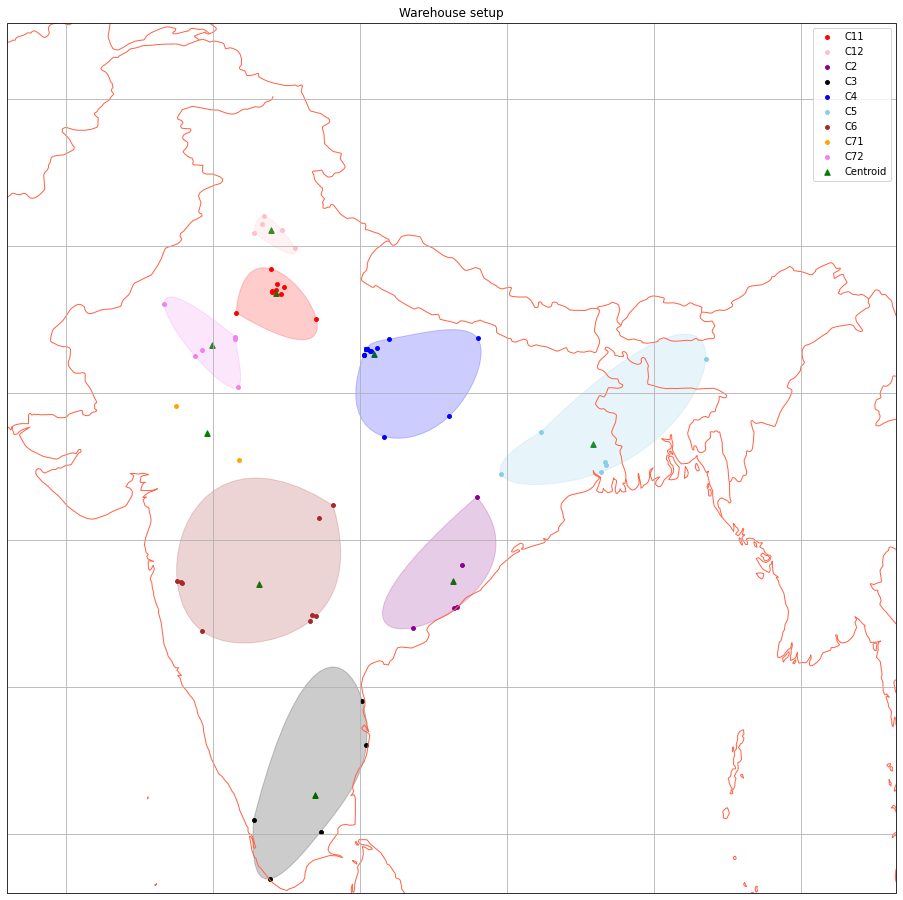

In [792]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)
c4 = k_data[k_data['ykmeans']==3]
c4 = c4.reset_index(drop=True)
c5 = k_data[k_data['ykmeans']==4]
c5 = c5.reset_index(drop=True)
c6 = k_data[k_data['ykmeans']==5]
c6 = c6.reset_index(drop=True)
c7 = k_data[k_data['ykmeans']==6]
c7 = c7.reset_index(drop=True)

kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc.drop(kmeanscc.index[6], inplace = True)
#kmeanscc.drop(kmeanscc.index[2], inplace = True)
kmeanscc.drop(kmeanscc.index[0], inplace = True)

X1=c1[c1.columns[0:2]]
kmeans_c1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_c1 = kmeans_c1.fit_predict(X1)

ykmeans_c1 = pd.DataFrame(y_kmeans_c1, columns = ['ykmeans_c1'])
k_data_c1 = pd.concat([c1, ykmeans_c1], axis=1)

c11 = k_data_c1[k_data_c1['ykmeans_c1']==0]
c11 = c11.reset_index(drop=True)
c12 = k_data_c1[k_data_c1['ykmeans_c1']==1]
c12 = c12.reset_index(drop=True)


X7=c7[c7.columns[0:2]]
kmeans_c7 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans_c7 = kmeans_c7.fit_predict(X7)

ykmeans_c7 = pd.DataFrame(y_kmeans_c7, columns = ['ykmeans_c7'])
k_data_c7 = pd.concat([c7, ykmeans_c7], axis=1)

c71 = k_data_c7[k_data_c7['ykmeans_c7']==0]
c71 = c71.reset_index(drop=True)
c72 = k_data_c7[k_data_c7['ykmeans_c7']==1]
c72 = c72.reset_index(drop=True)

kmeanscc_1 = pd.DataFrame(kmeans_c1.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_1

kmeanscc_7 = pd.DataFrame(kmeans_c7.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_7

kmeanscc = pd.concat([kmeanscc_1, kmeanscc, kmeanscc_7], ignore_index=True)

f_d = pd.concat([c11, c12, c2, c3, c4, c5, c6, c71, c72])

clust = [c11, c12, c2, c3, c4, c5, c6, c72]

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c11.Longitude, y=c11.Latitude, s = 15, c = 'red', label = 'C11', transform=crs.PlateCarree())
plt.scatter(x=c12.Longitude, y=c12.Latitude, s = 15, c = 'pink', label = 'C12', transform=crs.PlateCarree())
plt.scatter(x=c2.Longitude, y=c2.Latitude, s = 15, c = 'darkmagenta', label = 'C2', transform=crs.PlateCarree())
plt.scatter(x=c3.Longitude, y=c3.Latitude, s = 15, c = 'black', label = 'C3', transform=crs.PlateCarree())
plt.scatter(x=c4.Longitude, y=c4.Latitude, s = 15, c = 'blue', label = 'C4', transform=crs.PlateCarree())
plt.scatter(x=c5.Longitude, y=c5.Latitude, s = 15, c = 'skyblue', label = 'C5', transform=crs.PlateCarree())
plt.scatter(x=c6.Longitude, y=c6.Latitude, s = 15, c = 'brown', label = 'C6', transform=crs.PlateCarree())
plt.scatter(x=c71.Longitude, y=c71.Latitude, s = 15, c = 'orange', label = 'C71', transform=crs.PlateCarree())
plt.scatter(x=c72.Longitude, y=c72.Latitude, s = 15, c = 'violet', label = 'C72', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points11 = c11[['Longitude', 'Latitude']].values
points12 = c12[['Longitude', 'Latitude']].values
points2 = c2[['Longitude', 'Latitude']].values
points3 = c3[['Longitude', 'Latitude']].values
points4 = c4[['Longitude', 'Latitude']].values
points5 = c5[['Longitude', 'Latitude']].values
points6 = c6[['Longitude', 'Latitude']].values
#points71 = c71[['Longitude', 'Latitude']].values
points72 = c72[['Longitude', 'Latitude']].values

list5 = [points11, points12, points2, points3, points4, points5, points6, points72]
colors = ['red', 'pink', 'darkmagenta', 'black', 'blue', 'skyblue', 'brown', 'violet']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)


#plt.savefig('scatter9.png')
plt.legend()
plt.savefig('scatter9.png')
plt.show()

In [791]:
kmeanscc.to_csv('kmeanscc.csv')

In [793]:
f_d.to_csv('f_d.csv')

In [772]:
cc1 = kmeanscc
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1['Latitude'][i]
    ln = cc1['Longitude'][i]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
    
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_7n=sum(list_dis)
sum(list_dis)

[541.5118011970362, 292.1944862954408, 830.1236264057279, 1409.5354997348607, 1963.0508316829428, 1313.3459438055809, 2544.6147225972595, 299.68330783780095, 677.9785114056729]


9872.03873096232

In [773]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d7n=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d7n

,Apparel,Books,Electronics,Grocery,Total
0,46.37,55.91,52.58,68.52,223.38
1,24.45,37.08,19.12,61.54,142.19
2,19.11,46.91,40.49,38.01,144.52
3,11.95,42.61,13.75,61.09,129.40
4,182.41,237.05,93.09,330.92,843.47
5,31.58,70.57,20.51,43.02,165.68
6,47.89,50.74,50.43,88.66,237.72
7,11.57,18.35,3.27,28.84,62.03
8,29.91,30.69,15.78,85.74,162.12


In [746]:
quan_d7n.to_csv('quan_d7n.csv')

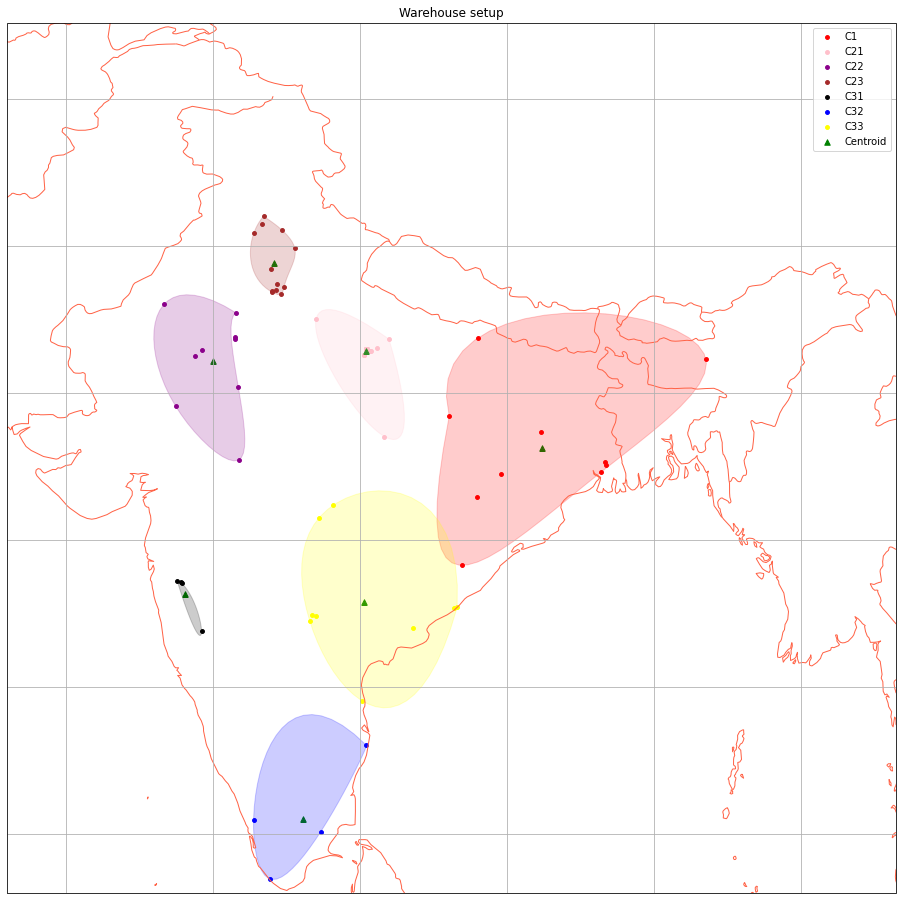

In [763]:
X=data1[data1.columns[0:2]]
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

ykmeans = pd.DataFrame(y_kmeans, columns = ['ykmeans'])
k_data = pd.concat([data1, ykmeans], axis=1)

c1 = k_data[k_data['ykmeans']==0]
c1 = c1.reset_index(drop=True)
c2 = k_data[k_data['ykmeans']==1]
c2 = c2.reset_index(drop=True)
c3 = k_data[k_data['ykmeans']==2]
c3 = c3.reset_index(drop=True)


kmeanscc = pd.DataFrame(kmeans.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc.drop(kmeanscc.index[2], inplace = True)
#kmeanscc.drop(kmeanscc.index[2], inplace = True)
kmeanscc.drop(kmeanscc.index[1], inplace = True)

X2=c2[c1.columns[0:2]]
kmeans_c2 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_c2 = kmeans_c2.fit_predict(X2)

ykmeans_c2 = pd.DataFrame(y_kmeans_c2, columns = ['ykmeans_c2'])
k_data_c2 = pd.concat([c2, ykmeans_c2], axis=1)

c21 = k_data_c2[k_data_c2['ykmeans_c2']==0]
c21 = c21.reset_index(drop=True)
c22 = k_data_c2[k_data_c2['ykmeans_c2']==1]
c22 = c22.reset_index(drop=True)
c23 = k_data_c2[k_data_c2['ykmeans_c2']==2]
c23 = c23.reset_index(drop=True)


X3=c3[c7.columns[0:2]]
kmeans_c3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_c3 = kmeans_c3.fit_predict(X3)

ykmeans_c3 = pd.DataFrame(y_kmeans_c3, columns = ['ykmeans_c3'])
k_data_c3 = pd.concat([c3, ykmeans_c3], axis=1)

c31 = k_data_c3[k_data_c3['ykmeans_c3']==0]
c31 = c31.reset_index(drop=True)
c32 = k_data_c3[k_data_c3['ykmeans_c3']==1]
c32 = c32.reset_index(drop=True)
c33 = k_data_c3[k_data_c3['ykmeans_c3']==2]
c33 = c33.reset_index(drop=True)

kmeanscc_2 = pd.DataFrame(kmeans_c2.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_2

kmeanscc_3 = pd.DataFrame(kmeans_c3.cluster_centers_, columns = ['Latitude', 'Longitude'])
kmeanscc_3

kmeanscc = pd.concat([kmeanscc, kmeanscc_2, kmeanscc_3], ignore_index=True)

clust = [c1, c21, c22, c23, c31, c32, c33]

fig = plt.figure(figsize=(20,16))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([68, 98.25, 8, 37.6], ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, edgecolor="tomato")
ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

plt.scatter(x=c1.Longitude, y=c1.Latitude, s = 15, c = 'red', label = 'C1', transform=crs.PlateCarree())
plt.scatter(x=c21.Longitude, y=c21.Latitude, s = 15, c = 'pink', label = 'C21', transform=crs.PlateCarree())
plt.scatter(x=c22.Longitude, y=c22.Latitude, s = 15, c = 'darkmagenta', label = 'C22', transform=crs.PlateCarree())
plt.scatter(x=c23.Longitude, y=c23.Latitude, s = 15, c = 'brown', label = 'C23', transform=crs.PlateCarree())
plt.scatter(x=c31.Longitude, y=c31.Latitude, s = 15, c = 'black', label = 'C31', transform=crs.PlateCarree())
plt.scatter(x=c32.Longitude, y=c32.Latitude, s = 15, c = 'blue', label = 'C32', transform=crs.PlateCarree())
plt.scatter(x=c33.Longitude, y=c33.Latitude, s = 15, c = 'yellow', label = 'C33', transform=crs.PlateCarree())
plt.scatter(x=kmeanscc.Longitude, y=kmeanscc.Latitude, s = 30, marker='^', c = 'green', label = 'Centroid', transform=crs.PlateCarree())
plt.title('Warehouse setup')


points1 = c1[['Longitude', 'Latitude']].values
points21 = c21[['Longitude', 'Latitude']].values
points22 = c22[['Longitude', 'Latitude']].values
points23 = c23[['Longitude', 'Latitude']].values
points31 = c31[['Longitude', 'Latitude']].values
points32 = c32[['Longitude', 'Latitude']].values
points33 = c33[['Longitude', 'Latitude']].values

list5 = [points1, points21, points22, points23, points31, points32, points33]
colors = ['red', 'pink', 'darkmagenta', 'brown', 'black', 'blue', 'yellow']

for i in range (0, len(list5)):
    points=list5[i]
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)



plt.legend()
plt.savefig('scatter3n.png')
plt.show()

In [764]:
cc1 = kmeanscc
cc2 = []
for i in range(0, len(cc1)):
    lt = cc1['Latitude'][i]
    ln = cc1['Longitude'][i]
    lat = radians(lt)
    lnt = radians(ln)
    cc2.append([lat, lnt])
    
list_dis=[]
for i in range(0, len(cc2)):
    ele1=cc2[i][0]
    ele2=cc2[i][1]
    clus=clust[i]
    dist=0
    for i in range(0, len(clus)):
        ele3 = clus['Lat'][i]
        ele4 = clus['Lon'][i]
        
        DLat = ele3-ele1
        DLon = ele4-ele2
            
        D = sin(DLat/2)**2 + cos(ele1) * cos(ele3) * sin(DLon/2)**2
        #print(sin(DLat/2)**2, cos(ele1), cos(ele3), sin(DLon/2)**2)
        if D<0:
            F=D
            D=(-F)
        #print(D)
        d = 2 * asin(sqrt(D))
        R=6371
        dist = dist + d*R
        
    list_dis.append(dist)
    
print(list_dis)
Co_3n=sum(list_dis)
sum(list_dis)

[3208.4894560174776, 956.4076523703584, 1550.8120965036455, 1317.286682286019, 300.1265638785167, 888.6326734169896, 2558.0275755750536]


10779.782700048061

In [765]:
quan=[]
for i in clust:
    A1=i['Apparel'].sum()
    B1=i['Books'].sum()
    C1=i['Electronics'].sum()
    D1=i['Grocery'].sum()
    T1=A1+B1+C1+D1
    quan.append([A1, B1, C1, D1, T1])
    
quan_d3n=pd.DataFrame(quan, columns=(['Apparel', 'Books', 'Electronics', 'Grocery', 'Total']))
quan_d3n

,Apparel,Books,Electronics,Grocery,Total
0,59.79,98.23,43.87,68.26,270.15
1,175.84,242.93,84.19,321.01,823.97
2,44.83,61.03,19.46,122.26,247.58
3,58.71,67.31,70.89,119.71,316.62
4,34.25,19.60,14.92,31.88,100.65
5,7.79,24.47,13.48,51.86,97.60
6,24.03,76.34,62.21,91.36,253.94


In [747]:
list_cos=[]
list_cos.append([Co_1, Co_2, Co_3, Co_4, Co_5, Co_6, Co_7, Co_7n, Co_4n])

In [748]:
list_c = pd.DataFrame(list_cos, columns=(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C9', 'C10']))

In [749]:
list_c

,C1,C2,C3,C4,C5,C6,C7,C9,C10
0,32068.619429,27094.713114,24077.126151,17500.634314,14696.683152,12724.081803,11140.769635,9872.038731,8960.027449


In [750]:
list_c.to_csv('list_c.csv')